# Polynomial Regression Overfitting

### Case study:  Higher order plynomial regression is prone to overfitting, revisit Exercise 1, let's try a degree 6 polynomial regression


$$ h_\theta (x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5 + \theta_6 x^6 $$


### Step 1: Import libraries and dataset

In [1]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
## Import the dataset

data = pd.read_csv('/Users/rohit/Documents/ML Lab/data/salary_data.csv')
# change the path as necessary

X = data.iloc[:, :-1].values # copy all columns excluding last column
Y = data.iloc[:, 1].values   # copy the last column only

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

### Step 2: Train degree 6 polynomial regression

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=6)

Xtrain_poly_feature = poly_feature.fit_transform(X_train)
Xtest_poly_feature = poly_feature.transform(X_test)

pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly_feature, Y_train)


Y_predict = pol_reg.predict(Xtest_poly_feature)


### Step 3: Polynomial regression line seems to be overfitting

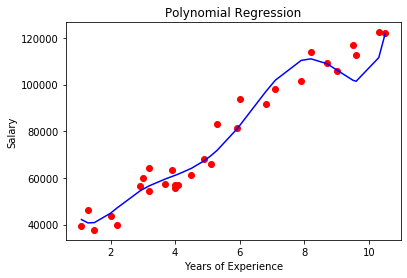

In [5]:
plt.scatter(X, Y, color='red')
plt.plot(X,pol_reg.predict(poly_feature.transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Step 4: Polynomial regression has indded overfitted MSE has increased and R2 score decreased

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
#Mean squared error regression loss

print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict))

# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error = 74756936.74
Variance score = 0.91
